In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('medicine_RS.csv')
dataset.head(10)


,Patient_ID,Age,Gender,Condition,Symptoms,Recommended_Medicine,Dosage,KeepContact
0,1,14.0,Female,Diabetes,"Shortness of breath, Fatigue",Aspirin,7364.0,No
1,2,37.0,Other,Diabetes,Fatigue,Ventolin,4190.0,No
2,3,62.0,Female,Flu,"Cough, Fever, Sneezing",Cetirizine,5779.0,Yes
3,4,3.0,Male,COVID-19,Fever,Amoxicillin,4120.0,Yes
4,5,49.0,Other,Flu,Cough,Ventolin,3001.0,No
5,6,56.0,Female,Allergy,"Fever, Fatigue",Aspirin,2667.0,No
6,7,97.0,Female,Hypertension,"Shortness of breath, Headache, Fatigue",Cetirizine,5782.0,Yes
7,8,68.0,Other,Flu,"Sneezing, Fatigue",Amoxicillin,7740.0,Yes
8,9,66.0,Female,Flu,"Cough, Fatigue, Fever",Insulin,6798.0,Yes
9,10,94.0,Male,Asthma,"Fatigue, Headache, Sneezing",Cetirizine,6784.0,No


In [39]:
print(dataset.isnull().sum())

Patient_ID               0
Age                     47
Gender                  36
Condition               32
Symptoms                33
Recommended_Medicine    33
Dosage                  36
KeepContact             36
dtype: int64


In [40]:
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
GenderMode = dataset['Gender'].mode()[0]
dataset['Gender'].fillna(GenderMode, inplace=True)
ConditionMode = dataset['Condition'].mode()[0]
dataset['Condition'].fillna(ConditionMode, inplace=True)
SymptomsMode = dataset['Symptoms'].mode()[0]
dataset['Symptoms'].fillna(SymptomsMode, inplace=True)
Recommended_MedicineMode = dataset['Recommended_Medicine'].mode()[0]
dataset['Recommended_Medicine'].fillna(Recommended_MedicineMode, inplace=True)
KeepContactMode = dataset['KeepContact'].mode()[0]
dataset['KeepContact'].fillna(KeepContactMode, inplace=True)
dataset['Dosage'].fillna(dataset['Dosage'].mean(), inplace=True)

print(dataset.isnull().sum())

Patient_ID              0
Age                     0
Gender                  0
Condition               0
Symptoms                0
Recommended_Medicine    0
Dosage                  0
KeepContact             0
dtype: int64


<ipython-input-40-17cfe526624b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
<ipython-input-40-17cfe526624b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

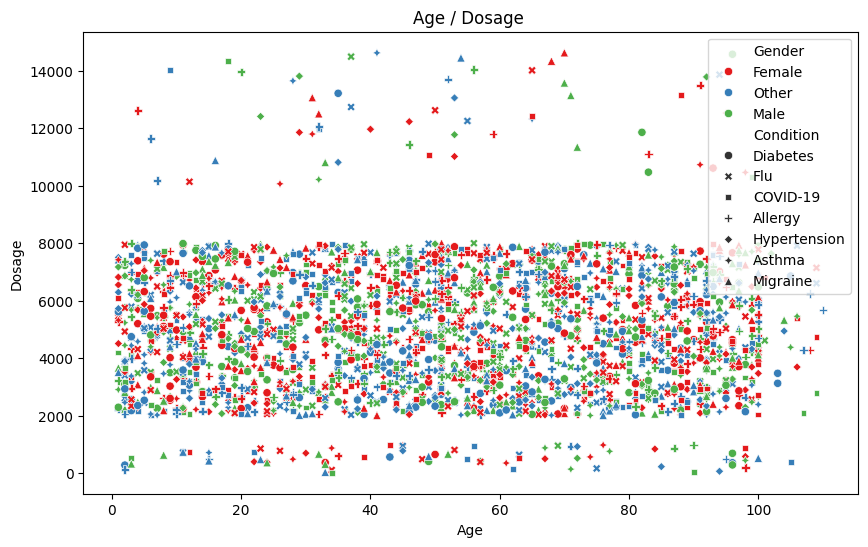

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Dosage', hue='Gender', style='Condition', data=dataset, palette='Set1')

plt.title('Age / Dosage ')
plt.xlabel('Age')
plt.ylabel('Dosage')

plt.show()

In [42]:
df_balanced = dataset[(dataset['Dosage'] >= 2000) & (dataset['Dosage'] <= 8000) & (dataset['Age'] < 100)]

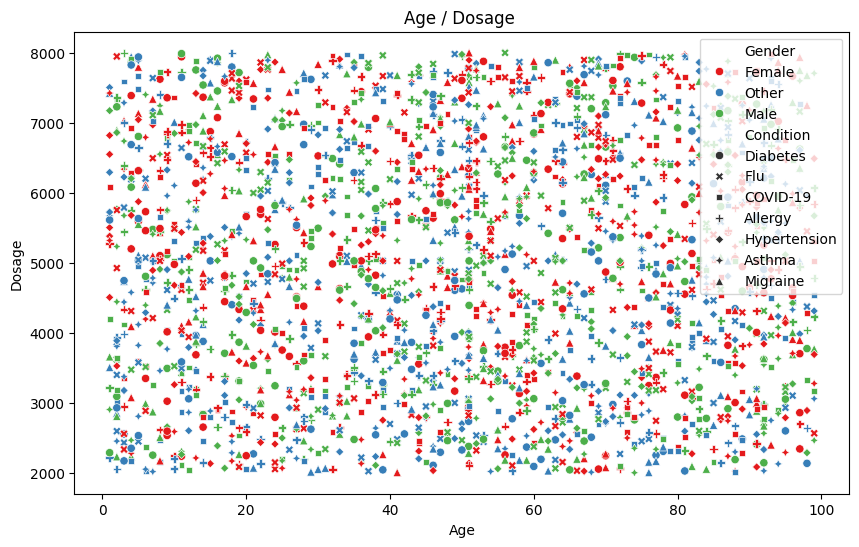

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Dosage', hue='Gender', style='Condition', data=df_balanced, palette='Set1')

plt.title('Age / Dosage ')
plt.xlabel('Age')
plt.ylabel('Dosage')

plt.show()

In [44]:
from sklearn.preprocessing import LabelEncoder

gender = LabelEncoder()
condition = LabelEncoder()
medicine = LabelEncoder()
Symptoms = LabelEncoder()
KeepContact = LabelEncoder()

df_balanced['Gender_Encoded'] = gender.fit_transform(df_balanced['Gender'])
df_balanced['Condition_Encoded'] = condition.fit_transform(df_balanced['Condition'])
df_balanced['Medicine_Encoded'] = medicine.fit_transform(df_balanced['Recommended_Medicine'])
df_balanced['Symptoms_Encoded'] = Symptoms.fit_transform(df_balanced['Symptoms'])
df_balanced['KeepContact_Encoded'] = Symptoms.fit_transform(df_balanced['KeepContact'])

df_balanced.drop(['Gender', 'Condition', 'Recommended_Medicine', 'Symptoms', 'KeepContact'], axis=1, inplace=True)


<ipython-input-44-8e335fc5f8d1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_balanced['Gender_Encoded'] = gender.fit_transform(df_balanced['Gender'])
<ipython-input-44-8e335fc5f8d1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_balanced['Condition_Encoded'] = condition.fit_transform(df_balanced['Condition'])
<ipython-input-44-8e335fc5f8d1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [45]:
x = df_balanced.iloc[:, :-1]
y = df_balanced.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [46]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15, p=7)

In [48]:
print(classifier.predict(sc.transform([[30,87000,87000,87000,87000,87000,87000]])))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [49]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [0 1]
 ...
 [1 1]
 [0 1]
 [0 1]]


In [50]:
#initial prediction
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[186 129]
 [178 106]]


0.48747913188647746

In [51]:
#adding Univariate Feature Selection to KNN model
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=2)
selectorTranform = selector.fit_transform(x, y)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(selectorTranform, y, test_size = 0.25, random_state = 0)

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15, p=7)

In [55]:
print(classifier.predict(sc.transform([[30,87000]])))

[1]


In [56]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 ...
 [0 1]
 [1 1]
 [1 1]]


In [57]:
#initial prediction
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[181 134]
 [156 128]]


0.5158597662771286

In [58]:
#adding L1-based feature selection to KNN model
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC



In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
LOne = LinearSVC(C=0.25, penalty="l1", dual=False)
LOne.fit(X_train, y_train)

LinearSVC(C=0.25, dual=False, penalty='l1')

In [61]:
sfm = SelectFromModel(LOne, prefit=True)
X_trainTrans = sfm.transform(X_train)
X_testTrans = sfm.transform(X_test)

In [62]:
classifier = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 7)
classifier.fit(X_trainTrans, y_train)

KNeighborsClassifier(n_neighbors=15, p=7)

In [63]:
print(classifier.predict(sc.transform([[30,87000]])))

[1]


In [64]:
y_pred = classifier.predict(X_testTrans)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 ...
 [0 1]
 [1 1]
 [1 1]]


In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[181 134]
 [156 128]]


0.5158597662771286

In [66]:
#SVM model
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [69]:
print(classifier.predict(sc.transform([[30,87000,87000,87000,87000,87000,87000]])))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [70]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[315   0]
 [284   0]]


0.5258764607679466

#Knn accuracy is higher

In [72]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid = {
    'n_neighbors': [1, 2, 6, 7, 9, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best parameters:  {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
Best score:  0.5401378752275875
